In [1]:
import pandas as pd
import numpy as np
from nilm_pre_processing import NilmPreProcessing
from nilm_dao import *

In [2]:
val_data = get_vndale1_data("val", 1800, False).to_pandas()
lb = get_label_encoder("vndale1")

Getting val data - window size: 1800: 100%|██████████| 128/128 [00:17<00:00,  7.34it/s]


In [34]:
val_data.head() 

,Time,In,Un,PF_n,Irms,Urms,MeanPF,P,Q,S,Label
0,2024-01-16_18-45-40,0.483746,223.844971,0.826197,0.283284,165.311122,0.824670,38.619335,14.981858,46.830058,30
1,2024-01-16_18-45-40,0.331401,219.980942,0.826197,0.283055,165.255432,0.824667,38.574980,14.964877,46.776407,30
2,2024-01-16_18-45-40,0.062699,152.863007,0.826197,0.282952,165.174610,0.824665,38.541909,14.952274,46.736440,30
3,2024-01-16_18-45-40,-0.063224,31.235987,0.820491,0.282958,165.149044,0.824663,38.536636,14.950454,46.730180,30
4,2024-01-16_18-45-40,-0.095886,-76.127174,0.820491,0.282975,165.210153,0.824663,38.553275,14.956833,46.750312,30


In [35]:
val_data["Label"] = lb.inverse_transform(val_data["Label"])

In [36]:
val_data.head()

,Time,In,Un,PF_n,Irms,Urms,MeanPF,P,Q,S,Label
0,2024-01-16_18-45-40,0.483746,223.844971,0.826197,0.283284,165.311122,0.824670,38.619335,14.981858,46.830058,"1,2,5,7"
1,2024-01-16_18-45-40,0.331401,219.980942,0.826197,0.283055,165.255432,0.824667,38.574980,14.964877,46.776407,"1,2,5,7"
2,2024-01-16_18-45-40,0.062699,152.863007,0.826197,0.282952,165.174610,0.824665,38.541909,14.952274,46.736440,"1,2,5,7"
3,2024-01-16_18-45-40,-0.063224,31.235987,0.820491,0.282958,165.149044,0.824663,38.536636,14.950454,46.730180,"1,2,5,7"
4,2024-01-16_18-45-40,-0.095886,-76.127174,0.820491,0.282975,165.210153,0.824663,38.553275,14.956833,46.750312,"1,2,5,7"


# Feature visualization

In [37]:
nilm_pp = NilmPreProcessing()

72000


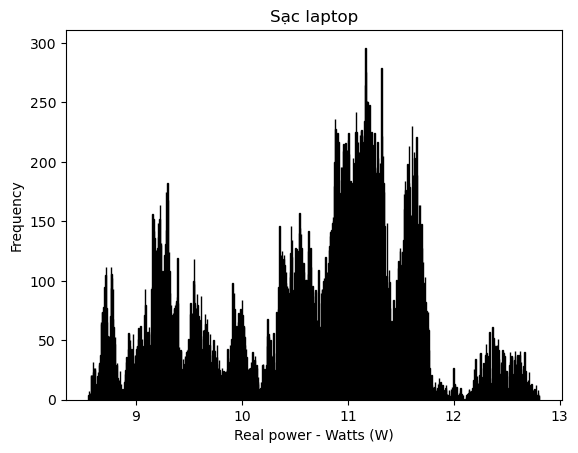

In [57]:
label_name = "7"
data_df = val_data[val_data["Label"] == label_name]
print(len(data_df))
nilm_pp.plot_distribution(array=data_df["P"].to_numpy(), 
                          plot_name="Sạc laptop", 
                          unit_name="Real power - Watts (W)",
                          min=0,
                          max=None)